# Main

Canada is among the world's most generous nations for immigrants and has one of the highest per capita admission rates. It has, on average, offered residency to about 200,000 immigrants and refugees a year over the past decade, earning a global reputation for an "open arms" attitude. The problem am trying to solve is how to send those people to right
states in Canada and how to builds malls and market places in Canada in places that 
have low population rates in order to avoid overcrowding certain states with all 
the people while leaving some empty. In this project I will study the best hot spots in Canada for new small businesses such as : restaurants , coffee shops and supermarkets. 
In away that fights overcrowdedness and maximize profits. 

# Data :

I scraped the data from wiki and then did data cleanig and data manipulation
this is the url : ' https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M

In [2]:
%pip install geopy
print("geopy is installed successfully")
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim# convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

     |████████████████████████████████| 112kB 2.6MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.
geopy is installed successfully
Libraries imported.


In [3]:
!wget -q -O 'newyork_data.json' https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M
print("Successfully Done!")

Successfully Done!


In [4]:
import pandas as pd
!pip install wikipedia
!pip install lxml
import lxml
import wikipedia as wp
import io
import requests
url="https://cocl.us/Geospatial_data"
s=requests.get(url).content
c=pd.read_csv(io.StringIO(s.decode('utf-8')))
html = wp.page("List of postal codes of Canada: M").html().encode("UTF-8")


     |████████████████████████████████| 122kB 5.8MB/s eta 0:00:01
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/87/2a/18/4e471fd96d12114d16fe4a446d00c3b38fb9efcb744bd31f4a
Successfully built wikipedia
     |████████████████████████████████| 5.5MB 6.3MB/s eta 0:00:01


In [5]:
!pip install lxml
import lxml
html = wp.page("List of postal codes of Egypt: M").html().encode("UTF-8")
print(html)
!pip install BeautifulSoup4
!pip install requests

b'<div class="mw-parser-output"><div class="shortdescription nomobile noexcerpt noprint searchaux" style="display:none">Wikipedia list article</div>\n<p>This list shows an overview of <a href="/wiki/Postal_code" title="Postal code">postal code</a> notation schemes for all countries that have postal or <a href="/wiki/ZIP_code" class="mw-redirect" title="ZIP code">ZIP code</a> systems.\n</p>\n<div id="toc" class="toc" role="navigation" aria-labelledby="mw-toc-heading"><input type="checkbox" role="button" id="toctogglecheckbox" class="toctogglecheckbox" style="display:none" /><div class="toctitle" lang="en" dir="ltr"><h2 id="mw-toc-heading">Contents</h2><span class="toctogglespan"><label class="toctogglelabel" for="toctogglecheckbox"></label></span></div>\n<ul>\n<li class="toclevel-1 tocsection-1"><a href="#List"><span class="tocnumber">1</span> <span class="toctext">List</span></a></li>\n<li class="toclevel-1 tocsection-2"><a href="#On_the_use_of_country_codes"><span class="tocnumber">2<

In [6]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
!pip install lxml
import lxml

#get html from wiki page and create soup object
source = requests.get("https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M")
!pip3 install lxml

soup = BeautifulSoup(source.text, "html5lib")

#using soup object, iterate the .wikitable to get the data from the HTML page and store it into a list
data = []
columns = []
table = soup.find(class_='wikitable')
for index, tr in enumerate(table.find_all('tr')):
    section = []
    for td in tr.find_all(['th','td']):
        section.append(td.text.rstrip())
    
    #First row of data is the header
    if (index == 0):
        columns = section
    else:
        data.append(section)

#convert list into Pandas DataFrame
canada_df = pd.DataFrame(data = data,columns = columns)
canada_df.head()

/bin/sh: 1: pip3: not found


,Postal Code,Borough,Neighborhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"


In [8]:


#Delete rows where Borough is 'Not assigned'
canada_df = canada_df[canada_df.Borough!= "Not assigned"]
print(canada_df.columns)
#Combine all neighbourhoods where postcode and Borough are the same
canada_df = canada_df.groupby(['Postcode', 'Borough'])['Neighborhood'].apply(list).apply(lambda x:', '.join(x)).to_frame().reset_index()
#if Neighbourhood is not assigned, replace by borough name
for index, row in canada_df.iterrows():
    if row['Neighborhood'] == 'Not assigned':
        row['Neighbourhood'] = row['Borough']

# define the dataframe columns
column_names = ['Postcode','Borough', 'Neighborhood'] 

# instantiate the dataframe
canada_df.columns = column_names


Index(['Postal Code', 'Borough', 'Neighborhood'], dtype='object')


KeyError: 'Postcode'

# Calaculations

In [ ]:
canada_df.head()

In [ ]:
canada_df

In [14]:
import seaborn as sns

In [15]:
sns.set()

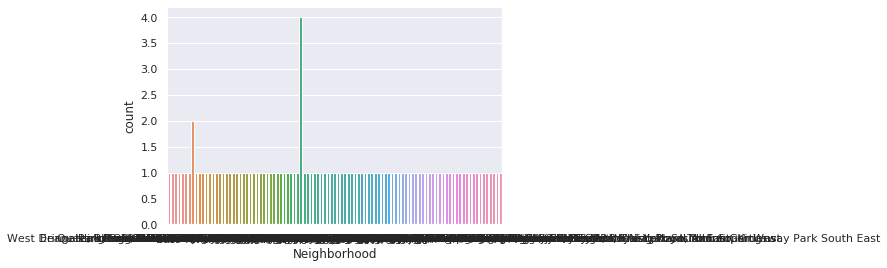

In [16]:
a=sns.countplot(canada_df['Neighborhood'])

In [12]:
canada_df['Neighborhood'].count

<bound method Series.count of 2                                              Parkwoods
3                                       Victoria Village
4                              Regent Park, Harbourfront
5                       Lawrence Manor, Lawrence Heights
6            Queen's Park, Ontario Provincial Government
8                Islington Avenue, Humber Valley Village
9                                         Malvern, Rouge
11                                             Don Mills
12                       Parkview Hill, Woodbine Gardens
13                              Garden District, Ryerson
14                                             Glencairn
17     West Deane Park, Princess Gardens, Martin Grov...
18                Rouge Hill, Port Union, Highland Creek
20                                             Don Mills
21                                      Woodbine Heights
22                                        St. James Town
23                                    Humewood-Cedarvale
2

In [ ]:
#Delete rows where Borough is 'Not assigned'
canada_df = canada_df[canada_df.Borough!= "Not assigned"]
print(canada_df.columns)
#Combine all neighbourhoods where postcode and Borough are the same
canada_df = canada_df.groupby(['Postcode', 'Borough'])['Neighborhood'].apply(list).apply(lambda x:', '.join(x)).to_frame().reset_index()
#if Neighbourhood is not assigned, replace by borough name
for index, row in canada_df.iterrows():
    if row['Neighborhood'] == 'Not assigned':
        row['Neighbourhood'] = row['Borough']

# define the dataframe columns
column_names = ['Postcode','Borough', 'Neighborhood'] 

# instantiate the dataframe
canada_df.columns = column_names

In [29]:
ByProvince = pd.read_csv('1710001101_databaseLoadingData.csv')

In [30]:
ByProvince.head()

,REF_DATE,GEO,DGUID,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,2003-10,Canada,2011A000011124,Persons,249,units,0,v11875,1,53610,NaN,NaN,NaN,0
1,2004-01,Canada,2011A000011124,Persons,249,units,0,v11875,1,54924,NaN,NaN,NaN,0
2,2004-04,Canada,2011A000011124,Persons,249,units,0,v11875,1,67233,NaN,NaN,NaN,0
3,2004-07,Canada,2011A000011124,Persons,249,units,0,v11875,1,65591,NaN,NaN,NaN,0
4,2004-10,Canada,2011A000011124,Persons,249,units,0,v11875,1,48099,NaN,NaN,NaN,0


The data above need cleaning the row must be dropped

In [38]:
ByProvince = ByProvince.drop([0,1,2,3,4],axis=0)

In [39]:
ByProvince.head()

,REF_DATE,GEO,DGUID,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
5,2003-10,Newfoundland and Labrador,2011A000210,Persons,249,units,0,v11876,2,79,NaN,NaN,NaN,0
6,2004-01,Newfoundland and Labrador,2011A000210,Persons,249,units,0,v11876,2,151,NaN,NaN,NaN,0
7,2004-04,Newfoundland and Labrador,2011A000210,Persons,249,units,0,v11876,2,171,NaN,NaN,NaN,0
8,2004-07,Newfoundland and Labrador,2011A000210,Persons,249,units,0,v11876,2,171,NaN,NaN,NaN,0
9,2004-10,Newfoundland and Labrador,2011A000210,Persons,249,units,0,v11876,2,83,NaN,NaN,NaN,0


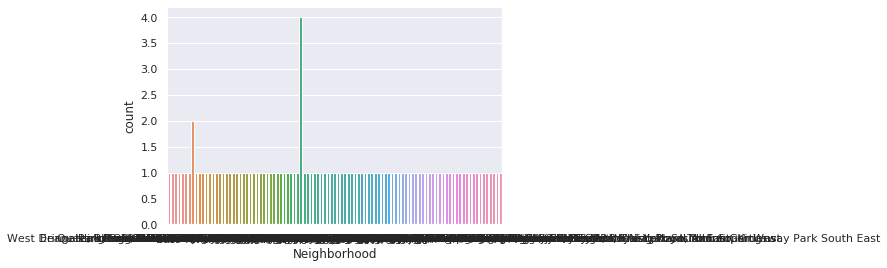

In [40]:
a=sns.countplot(canada_df['Neighborhood'])

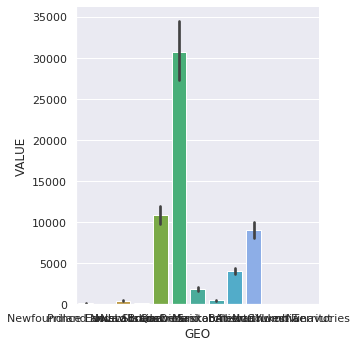

In [41]:
sns.catplot(x="GEO",y="VALUE",kind='bar',data=ByProvince)

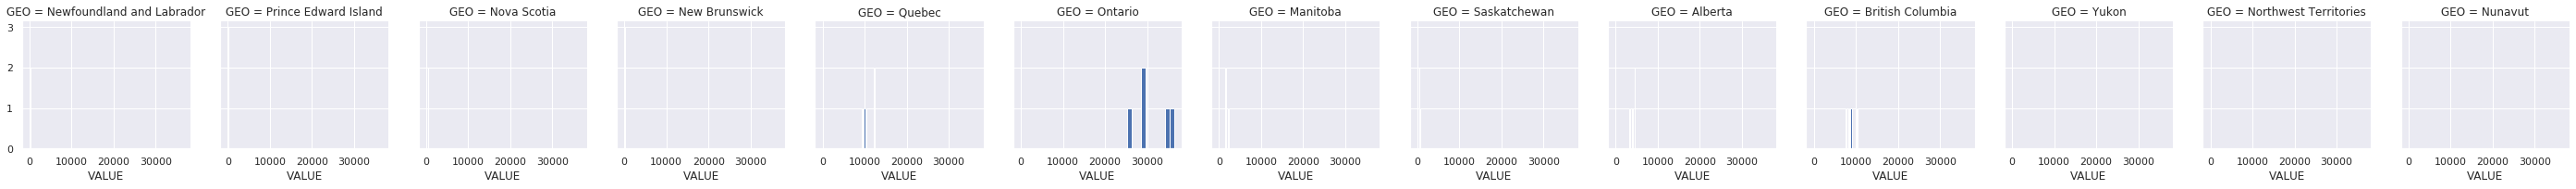

In [42]:
import matplotlib.pyplot as plt
g = sns.FacetGrid(ByProvince, col="GEO")
g.map(plt.hist, "VALUE")

# Conclusion

From the graphs above there is clearly an unequal distribution of the immigrants between the different provinces of Canada and that
is not an issue right now due to the small person per km squared ratio in Canada , but as the number of immigrants increases, It is
recommended to have a more linear distribution between different provinces in Canada to ensure low congestion rates , low crowdedness complaints and the healthy environment Canada is famous for. 